In [ ]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.7/25.7 MB 4.8 MB/s eta 0:00:0000:0100:01


In [ ]:
 !pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 4.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 3.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.7 MB/s eta 0:00:00


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor, Pool
from catboost import CatBoostRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import optuna
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load files
data_path = ''
train = pd.read_csv(data_path + 'Train.csv')
test = pd.read_csv(data_path + 'Test.csv')
sample_submission = pd.read_csv(data_path + 'SampleSubmission.csv')

In [ ]:
'''
import os

# Set OPENBLAS_MAIN_FREE environment variable to 1 to disable OpenBLAS
os.environ['OPENBLAS_MAIN_FREE'] = '1'


import threadpoolctl

# Reset OPENBLAS_MAIN_FREE environment variable
os.environ.pop('OPENBLAS_MAIN_FREE', None)'''

"\nimport os\n\n# Set OPENBLAS_MAIN_FREE environment variable to 1 to disable OpenBLAS\nos.environ['OPENBLAS_MAIN_FREE'] = '1'\n\n\nimport threadpoolctl\n\n# Reset OPENBLAS_MAIN_FREE environment variable\nos.environ.pop('OPENBLAS_MAIN_FREE', None)"

In [ ]:
'''

# Assuming your DataFrame is named 'df'
# Drop non-numeric columns and columns with many missing values
# You may need to handle missing values appropriately for your dataset
features_for_clustering = train.drop(['ID', 'District', 'Block', 'LandPreparationMethod', 'CropTillageDate', 'CropEstMethod', 'RcNursEstDate', 'SeedingSowingTransplanting', 'NursDetFactor', 'TransDetFactor', 'TransplantingIrrigationSource', 'TransplantingIrrigationPowerSource', 'OrgFertilizers', 'PCropSolidOrgFertAppMethod', 'CropbasalFerts', 'MineralFertAppMethod', 'FirstTopDressFert', 'MineralFertAppMethod', 'Harv_method', 'Harv_date', 'Threshing_date', 'Threshing_method', 'Stubble_use', 'Yield', 'MineralFertAppMethod.1'], axis=1)

# Handling missing values
features_for_clustering.fillna(features_for_clustering.mean(), inplace=True)

# Standardize the features
scaler = StandardScaler()
features_for_clustering_scaled = scaler.fit_transform(features_for_clustering)

# Define the number of clusters
num_clusters = 20  # You can adjust this number based on your requirements

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=1234, n_init=20)
train['Cluster'] = kmeans.fit_predict(features_for_clustering_scaled)

# Display information about the resulting DataFrame with the added 'Cluster' column
print(train.info()) '''


"\n\n# Assuming your DataFrame is named 'df'\n# Drop non-numeric columns and columns with many missing values\n# You may need to handle missing values appropriately for your dataset\nfeatures_for_clustering = train.drop(['ID', 'District', 'Block', 'LandPreparationMethod', 'CropTillageDate', 'CropEstMethod', 'RcNursEstDate', 'SeedingSowingTransplanting', 'NursDetFactor', 'TransDetFactor', 'TransplantingIrrigationSource', 'TransplantingIrrigationPowerSource', 'OrgFertilizers', 'PCropSolidOrgFertAppMethod', 'CropbasalFerts', 'MineralFertAppMethod', 'FirstTopDressFert', 'MineralFertAppMethod', 'Harv_method', 'Harv_date', 'Threshing_date', 'Threshing_method', 'Stubble_use', 'Yield', 'MineralFertAppMethod.1'], axis=1)\n\n# Handling missing values\nfeatures_for_clustering.fillna(features_for_clustering.mean(), inplace=True)\n\n# Standardize the features\nscaler = StandardScaler()\nfeatures_for_clustering_scaled = scaler.fit_transform(features_for_clustering)\n\n# Define the number of clusters

In [ ]:
'''
# Print unique values in each column before scaling
for column in features_for_clustering.columns:
    unique_values = features_for_clustering[column].unique()
    print(f"Unique values in {column}: {unique_values}")

# Standardize the features
scaler = StandardScaler()
features_for_clustering_scaled = scaler.fit_transform(features_for_clustering)
'''

'\n# Print unique values in each column before scaling\nfor column in features_for_clustering.columns:\n    unique_values = features_for_clustering[column].unique()\n    print(f"Unique values in {column}: {unique_values}")\n\n# Standardize the features\nscaler = StandardScaler()\nfeatures_for_clustering_scaled = scaler.fit_transform(features_for_clustering)\n'

In [ ]:
'''
# Identify columns with non-numeric values
non_numeric_columns = features_for_clustering.select_dtypes(exclude='number').columns
print(f"Columns with non-numeric values: {non_numeric_columns}")'''

'\n# Identify columns with non-numeric values\nnon_numeric_columns = features_for_clustering.select_dtypes(exclude=\'number\').columns\nprint(f"Columns with non-numeric values: {non_numeric_columns}")'

In [ ]:
# Convert date columns to datetime and extract month

train['Sqrt_Acre'] = np.sqrt(train['Acre'])
test['Sqrt_Acre'] = np.sqrt(test['Acre'])

date_columns = ['CropTillageDate']
for column in date_columns:
    train[column] = pd.to_datetime(train[column])
    train[f'{column}_Month'] = train[column].dt.month
    #train[f'{column}_Day'] = train[column].dt.day
    #train[f'{column}_Year'] = train[column].dt.year
    test[column] = pd.to_datetime(test[column])
    test[f'{column}_Month'] = test[column].dt.month
    #test[f'{column}_Day'] = test[column].dt.day
    #test[f'{column}_Year'] = test[column].dt.year

train[['NursDetFactor1', 'NursDetFactor2', 'NursDetFactor3', 'NursDetFactor4', 'NursDetFactor5']] = train['NursDetFactor'].str.split(' ', expand=True)
test[['NursDetFactor1', 'NursDetFactor2', 'NursDetFactor3', 'NursDetFactor4', 'NursDetFactor5']] = test['NursDetFactor'].str.split(' ', expand=True)

train[['TransDetFactor1', 'TransDetFactor2', 'TransDetFactor3', 'TransDetFactor4', 'TransDetFactor5']] = train['TransDetFactor'].str.split(' ', expand=True)
test[['TransDetFactor1', 'TransDetFactor2', 'TransDetFactor3', 'TransDetFactor4', 'TransDetFactor5']] = test['TransDetFactor'].str.split(' ', expand=True)

train[['LandPreparationMethod1', 'LandPreparationMethod2', 'LandPreparationMethod3', 'LandPreparationMethod4']] = train['LandPreparationMethod'].str.split(' ', expand=True)
test[['LandPreparationMethod1', 'LandPreparationMethod2', 'LandPreparationMethod3', 'LandPreparationMethod4']] = test['LandPreparationMethod'].str.split(' ', expand=True)

train[['OrgFertilizers1', 'OrgFertilizers2', 'OrgFertilizers3', 'OrgFertilizers4']] = train['OrgFertilizers'].str.split(' ', expand=True)
test[['OrgFertilizers1', 'OrgFertilizers2', 'OrgFertilizers3', 'OrgFertilizers4']] = test['OrgFertilizers'].str.split(' ', expand=True)

train[['CropbasalFerts1', 'CropbasalFerts2', 'CropbasalFerts3', 'CropbasalFerts4']] = train['CropbasalFerts'].str.split(' ', expand=True)
test[['CropbasalFerts1', 'CropbasalFerts2', 'CropbasalFerts3', 'CropbasalFerts4']] = test['CropbasalFerts'].str.split(' ', expand=True)

'''
#Define categorical columns
categorical_columns = [
   #'District', 'Block', 'CropTillageDepth', 'CropEstMethod',
   # 'Stubble_use', 'Threshing_method',  'Harv_method', 'MineralFertAppMethod', 'CropbasalFerts',
   # 'NoFertilizerAppln', 'CropTillageDate_Month',
   # 'NursDetFactor1', 'NursDetFactor2', 'NursDetFactor3', 'NursDetFactor4', 'NursDetFactor5',
   # 'TransDetFactor1', 'TransDetFactor2', 'TransDetFactor3', 'TransDetFactor4', 'TransDetFactor5',
   # 'LandPreparationMethod1', 'LandPreparationMethod2', 'LandPreparationMethod3', 'LandPreparationMethod4',
]

# Create dummy variables for the specified categorical columns
train = pd.get_dummies(train, columns=categorical_columns)
test = pd.get_dummies(test, columns=categorical_columns)
'''
#train.fillna(-999, inplace=True)
#test.fillna(-999, inplace=True)

# Display information about the resulting DataFrame

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  3870 non-null   object        
 1   District                            3870 non-null   object        
 2   Block                               3870 non-null   object        
 3   CultLand                            3870 non-null   int64         
 4   CropCultLand                        3870 non-null   int64         
 5   LandPreparationMethod               3870 non-null   object        
 6   CropTillageDate                     3870 non-null   datetime64[ns]
 7   CropTillageDepth                    3870 non-null   int64         
 8   CropEstMethod                       3870 non-null   object        
 9   RcNursEstDate                       3787 non-null   object        
 10  SeedingSowingTransplanti

In [ ]:
X = train.drop(['ID', 'Yield', 'Acre', 'CropTillageDate'], axis = 1)
X =X.select_dtypes(include=np.number)
y = train.Yield

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1234)

Top 25 Features:
                         Feature  Importance
19                     Sqrt_Acre   24.890960
3                SeedlingsPerPit    8.162529
16                Harv_hand_rent    7.767602
1                   CropCultLand    7.252985
11                     BasalUrea    6.369456
5                  TransIrriCost    6.184521
12                       1tdUrea    5.317701
7                        Ganaura    5.128652
4   TransplantingIrrigationHours    4.921826
10                      BasalDAP    4.647342
13                  1appDaysUrea    4.232580
0                       CultLand    4.069131
2               CropTillageDepth    2.504328
17                Residue_length    2.504180
6                  StandingWater    2.385659
20         CropTillageDate_Month    1.880685
9              NoFertilizerAppln    0.612683
8                     CropOrgFYM    0.402508
14                       2tdUrea    0.392186
15                  2appDaysUrea    0.328591
18                  Residue_perc    0.

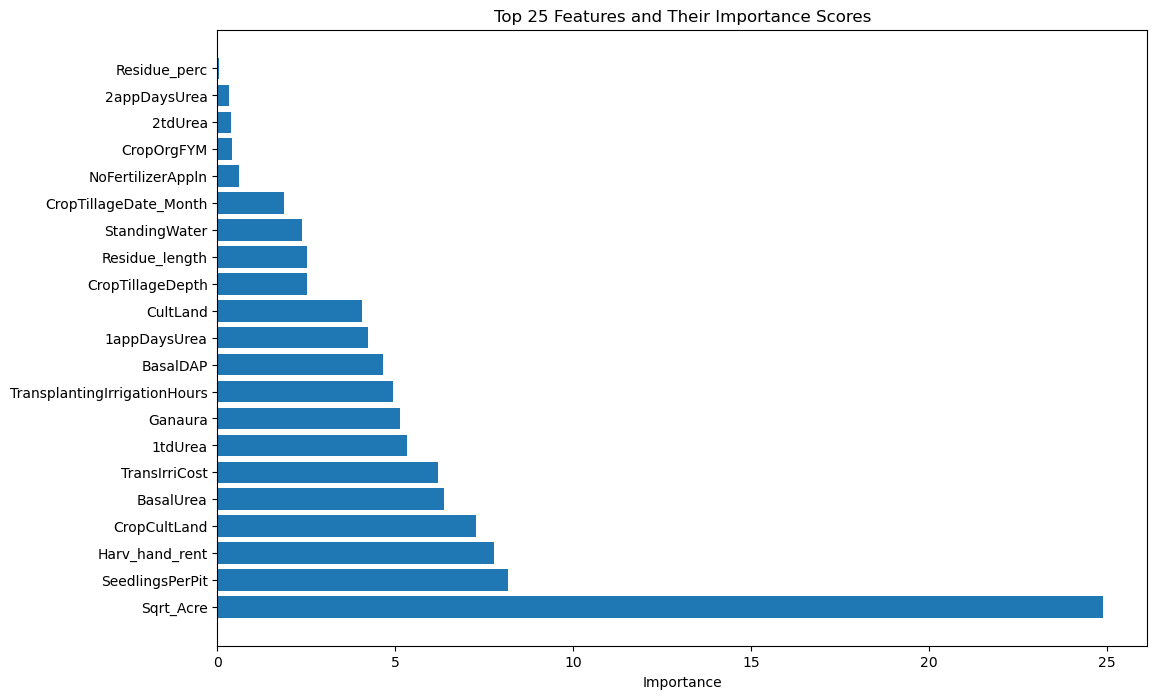

In [ ]:
# Fit the model on your training data
catboost_model.fit(X_train.fillna(0), y_train)

# Create a Pool object for the training data
train_pool = Pool(X_train.fillna(0), label=y_train)

# Get feature importance scores after training
feature_importance_after_training = catboost_model.get_feature_importance(data=train_pool, type='FeatureImportance')

# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame to store feature importance information
feature_importance_df_after_training = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_after_training})

# Sort the DataFrame by importance in descending order to get high importance features first
feature_importance_df_after_training = feature_importance_df_after_training.sort_values(by='Importance', ascending=False)

# Display the top 25 features
top_25_features = feature_importance_df_after_training.head(25)

# Display the top 25 features
print("Top 25 Features:")
print(top_25_features)

# Plot the top 25 features and their importance scores
plt.figure(figsize=(12, 8))
plt.barh(top_25_features['Feature'], top_25_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 25 Features and Their Importance Scores')
plt.show()


Low Importance Features:
                         Feature  Importance
18                  Residue_perc    0.004061
8                     CropOrgFYM    0.122113
15                  2appDaysUrea    0.507175
14                       2tdUrea    0.566610
9              NoFertilizerAppln    0.756913
6                  StandingWater    0.943030
7                        Ganaura    1.430697
17                Residue_length    1.645770
11                     BasalUrea    1.689110
4   TransplantingIrrigationHours    1.940882


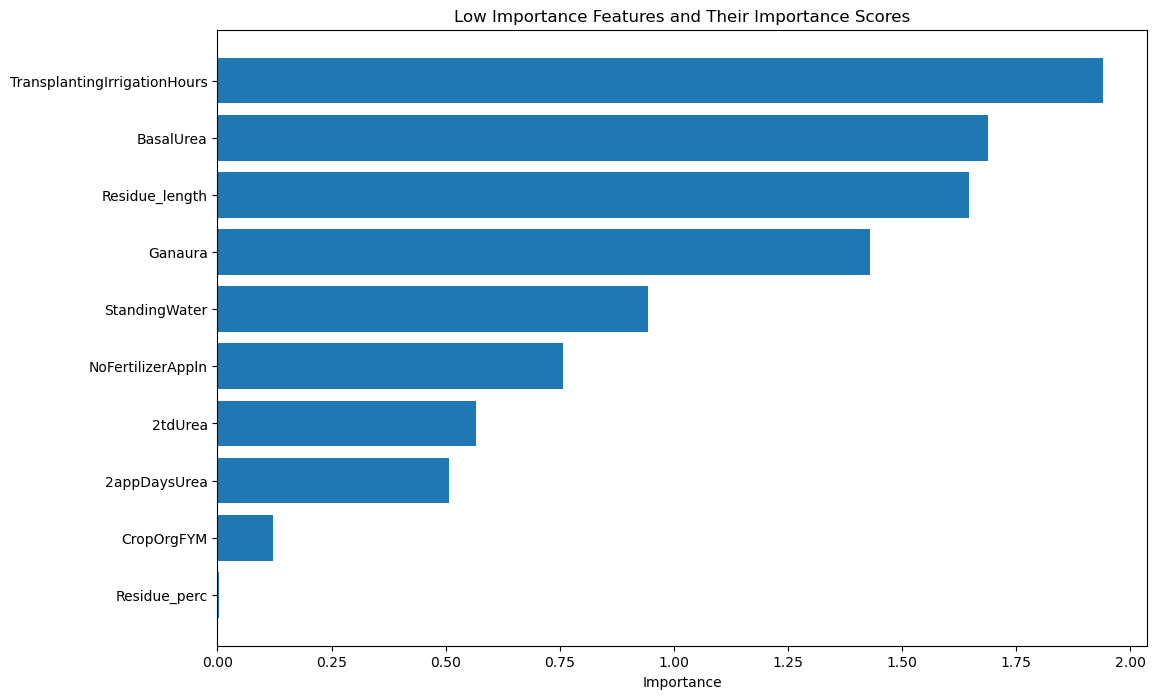

In [ ]:

# Instantiate CatBoostRegressor model with your desired hyperparameters
catboost_model = CatBoostRegressor(iterations=100, depth=10, learning_rate=0.05, verbose=0, random_state=1234)

# Fit the model on your training data
catboost_model.fit(X_train.fillna(0), y_train)

# Create a Pool object for the training data
train_pool = Pool(X_train.fillna(0), label=y_train)

# Get feature importance scores after training
feature_importance_after_training = catboost_model.get_feature_importance(data=train_pool, type='FeatureImportance')

# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame to store feature importance information
feature_importance_df_after_training = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_after_training})

# Sort the DataFrame by importance in ascending order to get low importance features first
feature_importance_df_after_training = feature_importance_df_after_training.sort_values(by='Importance', ascending=True)

# Display the features with low importance
low_importance_threshold = 2  # You can adjust this threshold
low_importance_features = feature_importance_df_after_training[feature_importance_df_after_training['Importance'] < low_importance_threshold]

# Display the features with low importance
print("Low Importance Features:")
print(low_importance_features)

# Plot the features and their importance scores
plt.figure(figsize=(12, 8))
plt.barh(low_importance_features['Feature'], low_importance_features['Importance'])
plt.xlabel('Importance')
plt.title('Low Importance Features and Their Importance Scores')
plt.show()


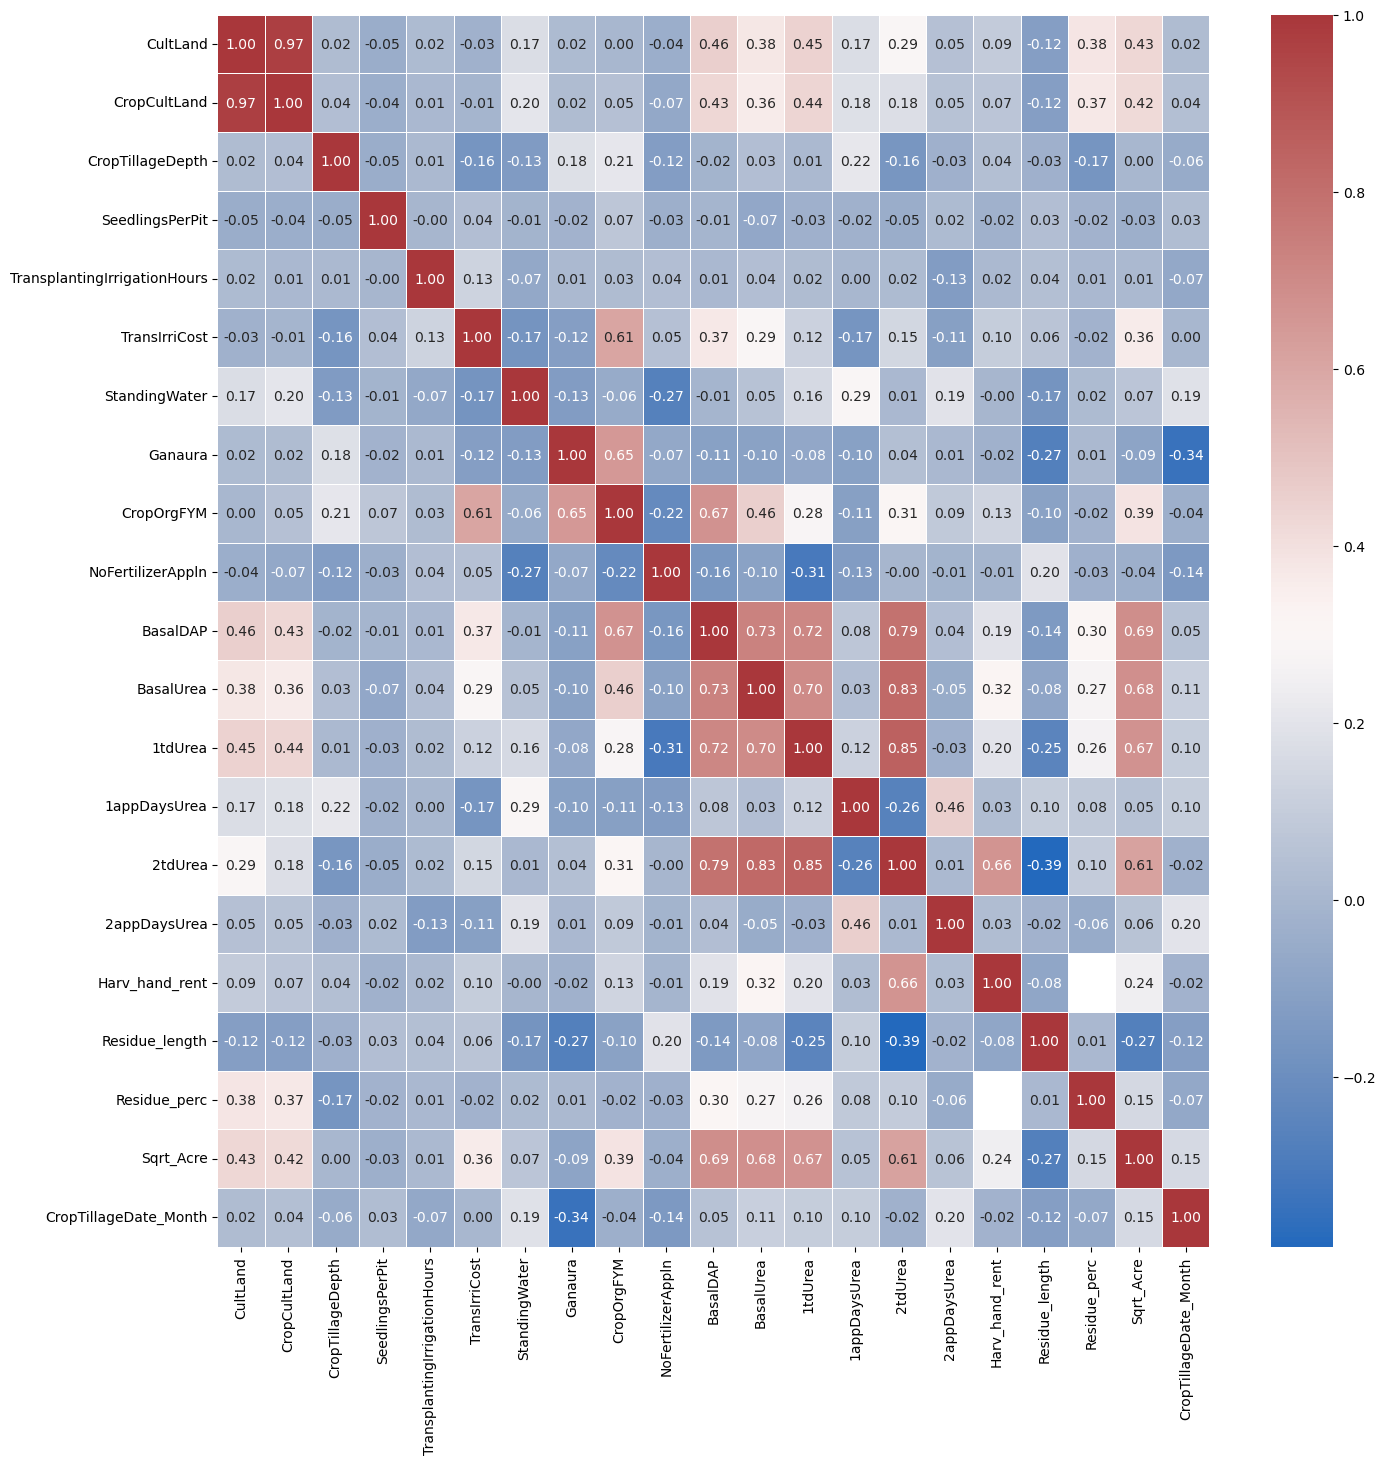

In [ ]:
heat_map_data = X.select_dtypes(include=['number'])

corr = heat_map_data.corr()
matrix = corr.values

fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(
    matrix,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    ax=ax,
    cmap="vlag",
    xticklabels=corr.columns,
    yticklabels=corr.columns,
)
plt.show()

In [ ]:
catboost_model = CatBoostRegressor(random_state=1234)
catboost_param_grid = {
    'n_estimators': [400],
    'depth': [10],
    'verbose': [0],
}

# Perform grid search for CatBoostRegressor
catboost_grid_search = GridSearchCV(catboost_model, catboost_param_grid, cv=10, scoring='neg_mean_squared_error')
catboost_grid_search.fit(X_train, y_train)
catboost_best_params = catboost_grid_search.best_params_
print("CatBoost Best Parameters:", catboost_best_params)

# Fit CatBoostRegressor model with the best hyperparameters
catboost_model = CatBoostRegressor(random_state=1234, **catboost_best_params)
catboost_model.fit(X_train, y_train)

# Make predictions using CatBoostRegressor with selected features
catboost_model.fit(X_train, y_train)
catboost_preds = catboost_model.predict(X_test)

# Measure CatBoostRegressor performance
catboost_rmse = mean_squared_error(y_test, catboost_preds, squared=False)
print("CatBoostRegressor RMSE with selected features:", catboost_rmse)

CatBoost Best Parameters: {'depth': 10, 'n_estimators': 400, 'verbose': 0}
CatBoostRegressor RMSE with selected features: 362.15420658115374


In [ ]:
import optuna
import numpy as np
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

def objective_catboost(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),  # Vary the number of trees
        'depth': trial.suggest_int('depth', 6, 15),  # Vary the depth of trees
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),  # Vary the learning rate
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.1, 1.0),  # Fraction of features to consider at each level
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),  # Fraction of samples used for fitting the trees
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.1, 10.0),  # L2 regularization term on weights
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 20),  # Minimum number of samples in leaf
        'max_bin': trial.suggest_int('max_bin', 1, 255),  # Maximum number of bins for numeric features
       # 'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.1, 5.0),  # Controls the balance of positive and negative weights
        'random_state': 1234,
        'verbose': 0,
        # Add other hyperparameters here if needed
    }

    catboost_model = CatBoostRegressor(**params)

    catboost_model.fit(X_train, y_train)
    catboost_preds = catboost_model.predict(X_test)

    catboost_rmse = mean_squared_error(y_test, catboost_preds, squared=False)

    return catboost_rmse

In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective_catboost,  n_trials=1000)  # You can adjust the number of trials

# Get the best hyperparameters
best_params = study.best_params

print("Best Parameters:", best_params)

[I 2023-11-18 10:25:21,588] A new study created in memory with name: no-name-b34bf819-bf8f-460f-8f95-9a7e618e3100
[I 2023-11-18 10:25:24,809] Trial 0 finished with value: 365.3961213291305 and parameters: {'n_estimators': 706, 'depth': 13, 'learning_rate': 0.17988782295597655, 'colsample_bylevel': 0.3119676261132799, 'subsample': 0.679449369192195, 'l2_leaf_reg': 3.720254723978186, 'min_child_samples': 2, 'max_bin': 46}. Best is trial 0 with value: 365.3961213291305.
[I 2023-11-18 10:25:25,261] Trial 1 finished with value: 372.22893666329406 and parameters: {'n_estimators': 588, 'depth': 10, 'learning_rate': 0.22973851375151058, 'colsample_bylevel': 0.14459112074878652, 'subsample': 0.11478693548171215, 'l2_leaf_reg': 6.3461114631182465, 'min_child_samples': 6, 'max_bin': 126}. Best is trial 0 with value: 365.3961213291305.
[I 2023-11-18 10:25:26,842] Trial 2 finished with value: 359.90539411439244 and parameters: {'n_estimators': 489, 'depth': 12, 'learning_rate': 0.2229059098358651, 

Best Parameters: {'n_estimators': 922, 'depth': 9, 'learning_rate': 0.07619625990145842, 'colsample_bylevel': 0.9769518411996442, 'subsample': 0.9155682601988875, 'l2_leaf_reg': 6.830123229897532, 'min_child_samples': 2, 'max_bin': 90}


In [ ]:
catboost_model = CatBoostRegressor(random_state=1234)
catboost_param_grid = {
    'n_estimators': [922],
    'depth': [9],
    'learning_rate': [0.07619625990145842],
    'colsample_bylevel': [0.9769518411996442],
    'subsample': [0.9155682601988875],
    'l2_leaf_reg': [6.830123229897532],
    'min_child_samples': [2],
    'max_bin': [90],
    'verbose': [0]
}

# Perform grid search for CatBoostRegresso
catboost_grid_search = GridSearchCV(catboost_model, catboost_param_grid, cv=20, scoring='neg_mean_squared_error')
catboost_grid_search.fit(X_train.fillna(0), y_train)
catboost_best_params = catboost_grid_search.best_params_
print("CatBoost Best Parameters:", catboost_best_params)

# Fit CatBoostRegressor model with the best hyperparameters
catboost_model = CatBoostRegressor(random_state=1234, **catboost_best_params)
catboost_model.fit(X_train.fillna(0), y_train)

# Make predictions using CatBoostRegressor
catboost_preds = catboost_model.predict(X_test.fillna(0))

# Measure CatBoostRegressor performance
catboost_rmse = mean_squared_error(y_test, catboost_preds, squared=False)
print("CatBoostRegressor RMSE:", catboost_rmse)

CatBoost Best Parameters: {'colsample_bylevel': 0.9769518411996442, 'depth': 9, 'l2_leaf_reg': 6.830123229897532, 'learning_rate': 0.07619625990145842, 'max_bin': 90, 'min_child_samples': 2, 'n_estimators': 922, 'subsample': 0.9155682601988875, 'verbose': 0}
CatBoostRegressor RMSE: 325.30950911335356


In [ ]:
# Identify columns present in train but not in test
missing_columns_train = set(X_train.columns) - set(test.columns)

# Identify columns present in test but not in train
missing_columns_test = set(test.columns) - set(X_train.columns)

# Decide how to handle missing columns (e.g., drop them or add to the test DataFrame)
# In this example, we'll add missing columns to the test DataFrame with NaN values
for col in missing_columns_train:
    test[col] = np.nan

# Now both train and test DataFrames have the same columns
# You can proceed with your code as before

# Make predictions on the Zindi test set
test_df = test[X_train.columns]  # Use X_train.columns to select the same features
preds = catboost_model.predict(test_df.fillna(0))

# Create submission file to be uploaded to Zindi for scoring
sub = pd.DataFrame({'ID': test['ID'], 'Yield': preds})
sub.to_csv('BenchmarkSubmission.csv', index=False)

sub.head()

,ID,Yield
0,ID_F9XXEXN2ADR2,571.226404
1,ID_SO3VW2X4QO93,408.401697
2,ID_UKUQ7JM8E894,469.576059
3,ID_QUISMWEZR2H4,360.814113
4,ID_25JGI455VKCZ,523.572768
